In [1]:
import requests
from bs4 import BeautifulSoup


In [2]:
url="https://www.apartmentlist.com/rentonomics/national-rent-data/"

In [3]:
headers={"User-Agent":"Mozilla/5.0"}

In [4]:
response=requests.get(url, headers=headers)

In [5]:
response.status_code

200

In [6]:
response.content

'\n<!doctype html>\n<html lang="en-US"\n xmlns:fb="http://ogp.me/ns/fb#">\n<head>\n  <meta charset="utf-8">\n  <meta http-equiv="x-ua-compatible" content="ie=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <meta property="fb:app_id" content="161786420551491" />\n  <title>May 2020 United States Rent Report - Apartment List</title>\n\n<!-- This site is optimized with the Yoast SEO plugin v13.0 - https://yoast.com/wordpress/plugins/seo/ -->\n<meta name="description" content="Apartment List publishes monthly rent reports to examine key trends in cities and states across the nation. How have rents in your city changed recently?"/>\n<meta name="robots" content="max-snippet:-1, max-image-preview:large, max-video-preview:-1"/>\n<link rel="canonical" href="https://www.apartmentlist.com/rentonomics/national-rent-data/" />\n<meta property="og:locale" content="en_US" />\n<meta property="og:type" content="article" />\n<meta property="og:title" content="May 2020 Uni

In [7]:
soup=BeautifulSoup(response.content, "html.parser")

In [8]:
stat_table = soup.find_all("table", id="tablepress-378")

In [9]:
stat_table

[<table class="tablepress tablepress-id-378" id="tablepress-378">\n<thead>\n<tr class="row-1 odd">\n<th class="column-1">Location</th><th class="column-2">Type</th><th class="column-3">Median 1BR rent</th><th class="column-4">Median 2BR rent</th><th class="column-5">M/M rent change</th><th class="column-6">Y/Y rent change</th>\n</tr>\n</thead>\n<tbody class="row-hover">\n<tr class="row-2 even">\n<td class="column-1">National</td><td class="column-2">National</td><td class="column-3">$964</td><td class="column-4">$1,196 </td><td class="column-5">0.0%</td><td class="column-6">1.4%</td>\n</tr>\n<tr class="row-3 odd">\n<td class="column-1">Alabama</td><td class="column-2">State</td><td class="column-3">$685</td><td class="column-4">$832</td><td class="column-5">0.0%</td><td class="column-6">2.6%</td>\n</tr>\n<tr class="row-4 even">\n<td class="column-1">Alaska</td><td class="column-2">State</td><td class="column-3">$937</td><td class="column-4">$1,199 </td><td class="column-5">0.2%</td><td

In [10]:
len(stat_table)

1

In [11]:
stat_table=stat_table[0]

In [12]:
type(stat_table)

bs4.element.Tag

In [13]:
for row in stat_table.find_all('tr'):
    for cell in row.find_all('td'):
        print(cell.text)

National
National
$964
$1,196 
0.0%
1.4%
Alabama
State
$685
$832
0.0%
2.6%
Alaska
State
$937
$1,199 
0.2%
1.0%
Arizona
State
$873
$1,103 
-0.2%
2.8%
Arkansas
State
$578
$730
0.1%
0.7%
California
State
$1,456 
$1,856 
-0.1%
1.3%
Colorado
State
$1,045 
$1,325 
-0.1%
1.0%
Connecticut
State
$1,084 
$1,358 
0.1%
1.2%
Delaware
State
$1,029 
$1,254 
0.2%
3.9%
District of Columbia
State
$1,510 
$1,742 
-0.1%
1.7%
Florida
State
$984
$1,227 
-0.2%
1.5%
Georgia
State
$882
$1,040 
-0.1%
0.7%
Idaho
State
$662
$856
0.1%
2.2%
Illinois
State
$915
$1,097 
0.1%
1.0%
Indiana
State
$663
$833
0.0%
1.4%
Iowa
State
$606
$775
0.0%
0.9%
Kansas
State
$673
$862
0.0%
1.8%
Kentucky
State
$608
$773
0.1%
0.4%
Louisiana
State
$684
$831
0.0%
-0.7%
Maine
State
$777
$965
0.2%
1.9%
Maryland
State
$1,265 
$1,524 
0.0%
0.7%
Massachusetts
State
$1,322 
$1,643 
0.0%
1.6%
Michigan
State
$725
$928
0.0%
1.1%
Minnesota
State
$862
$1,095 
0.0%
1.3%
Mississippi
State
$664
$809
0.0%
0.8%
Missouri
State
$666
$852
0.1%
1.1%
Montana
S

In [14]:
states=stat_table.find_all("td", class_="column-1")

In [15]:
print(states)

[<td class="column-1">National</td>, <td class="column-1">Alabama</td>, <td class="column-1">Alaska</td>, <td class="column-1">Arizona</td>, <td class="column-1">Arkansas</td>, <td class="column-1">California</td>, <td class="column-1">Colorado</td>, <td class="column-1">Connecticut</td>, <td class="column-1">Delaware</td>, <td class="column-1">District of Columbia</td>, <td class="column-1">Florida</td>, <td class="column-1">Georgia</td>, <td class="column-1">Idaho</td>, <td class="column-1">Illinois</td>, <td class="column-1">Indiana</td>, <td class="column-1">Iowa</td>, <td class="column-1">Kansas</td>, <td class="column-1">Kentucky</td>, <td class="column-1">Louisiana</td>, <td class="column-1">Maine</td>, <td class="column-1">Maryland</td>, <td class="column-1">Massachusetts</td>, <td class="column-1">Michigan</td>, <td class="column-1">Minnesota</td>, <td class="column-1">Mississippi</td>, <td class="column-1">Missouri</td>, <td class="column-1">Montana</td>, <td class="column-1"

In [16]:
with open ('rent.txt', "w") as r:
    for row in stat_table.find_all('tr'):
        for cell in row.find_all('td'):
            r.write(cell.text.ljust(22))
        r.write("\n")    

In [17]:
state_dict=[]
for row in stat_table.find_all('tr'):
        for cell in row.find_all('td', class_="column-1"):
            state_dict.append(cell.text)
            
print(state_dict)




[u'National', u'Alabama', u'Alaska', u'Arizona', u'Arkansas', u'California', u'Colorado', u'Connecticut', u'Delaware', u'District of Columbia', u'Florida', u'Georgia', u'Idaho', u'Illinois', u'Indiana', u'Iowa', u'Kansas', u'Kentucky', u'Louisiana', u'Maine', u'Maryland', u'Massachusetts', u'Michigan', u'Minnesota', u'Mississippi', u'Missouri', u'Montana', u'Nebraska', u'Nevada', u'New Hampshire', u'New Jersey', u'New Mexico', u'New York', u'North Carolina', u'North Dakota', u'Ohio', u'Oklahoma', u'Oregon', u'Pennsylvania', u'Rhode Island', u'South Carolina', u'South Dakota', u'Tennessee', u'Texas', u'Utah', u'Vermont', u'Virginia', u'Washington', u'West Virginia', u'Wisconsin', u'Wyoming', u'Abilene, TX', u'Acworth, GA', u'Adelanto, CA', u'Aiken, SC', u'Albany, NY', u'Albany, OR', u'Albuquerque, NM', u'Alexandria, VA', u'Allen, TX', u'Alpharetta, GA', u'Altamonte Springs, FL', u'Amarillo, TX', u'Amelia, OH', u'Ames, IA', u'Anaheim, CA', u'Anchorage, AK', u'Anderson, IN', u'Ann Arbor, 

In [18]:
type_dict=[]
for row in stat_table.find_all('tr'):
        for cell in row.find_all('td', class_="column-2"):
            type_dict.append(cell.text)
            


In [19]:
median_dict=[]
for row in stat_table.find_all('tr'):
        for cell in row.find_all('td', class_="column-3"):
            median_dict.append(cell.text)
            


In [20]:
median2_dict=[]
for row in stat_table.find_all('tr'):
        for cell in row.find_all('td', class_="column-4"):
            median2_dict.append(cell.text)
            


In [21]:
mmrentchange_dict=[]
for row in stat_table.find_all('tr'):
        for cell in row.find_all('td', class_="column-5"):
            mmrentchange_dict.append(cell.text)
            


In [22]:
yyrentchange_dict=[]
for row in stat_table.find_all('tr'):
        for cell in row.find_all('td', class_="column-6"):
            yyrentchange_dict.append(cell.text)


In [23]:
import pandas as pd
import numpy as np

In [24]:
df=pd.DataFrame(list(zip(state_dict,type_dict,median_dict,median2_dict,mmrentchange_dict,yyrentchange_dict)), columns=["Location","Type","Median 1BR Rent","Median 2BR Rent", "M/M Rent Change", "Y/Y Rent Change"])

In [25]:
df

,Location,Type,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
0,National,National,$964,"$1,196",0.0%,1.4%
1,Alabama,State,$685,$832,0.0%,2.6%
2,Alaska,State,$937,"$1,199",0.2%,1.0%
3,Arizona,State,$873,"$1,103",-0.2%,2.8%
4,Arkansas,State,$578,$730,0.1%,0.7%
5,California,State,"$1,456","$1,856",-0.1%,1.3%
6,Colorado,State,"$1,045","$1,325",-0.1%,1.0%
7,Connecticut,State,"$1,084","$1,358",0.1%,1.2%
8,Delaware,State,"$1,029","$1,254",0.2%,3.9%
9,District of Columbia,State,"$1,510","$1,742",-0.1%,1.7%


In [26]:
df.to_csv("rent data", index=False)

In [27]:
#after scraping data types all "object"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 6 columns):
Location           711 non-null object
Type               711 non-null object
Median 1BR Rent    711 non-null object
Median 2BR Rent    711 non-null object
M/M Rent Change    711 non-null object
Y/Y Rent Change    711 non-null object
dtypes: object(6)
memory usage: 33.4+ KB


In [28]:
# changing type object to float after scraping. We get rid of "$" amd ","
def clean_currency(x):
        return(x.replace('$',"").replace(',',""))
    

In [29]:
#changing column "Median 1BR Rent" from "$" and ","
df["Median 1BR Rent"].apply(clean_currency)


0        964
1        685
2        937
3        873
4        578
5      1456 
6      1045 
7      1084 
8      1029 
9      1510 
10       984
11       882
12       662
13       915
14       663
15       606
16       673
17       608
18       684
19       777
20     1265 
21     1322 
22       725
23       862
24       664
25       666
26       623
27       660
28       904
29     1051 
       ...  
681      620
682      906
683    1002 
684    1518 
685      566
686    1328 
687    1805 
688      750
689    1104 
690      749
691      746
692    1304 
693    1010 
694    1147 
695      572
696    1448 
697      600
698      736
699      676
700      681
701    1045 
702      980
703      999
704      626
705      703
706      577
707      874
708      694
709      898
710         
Name: Median 1BR Rent, Length: 711, dtype: object

In [30]:
#cleaning column "Median 2BR Rent" from "$" and ","
df["Median 2BR Rent"].apply(clean_currency)

0      1196 
1        832
2      1199 
3      1103 
4        730
5      1856 
6      1325 
7      1358 
8      1254 
9      1742 
10     1227 
11     1040 
12       856
13     1097 
14       833
15       775
16       862
17       773
18       831
19       965
20     1524 
21     1643 
22       928
23     1095 
24       809
25       852
26       791
27       844
28     1135 
29     1341 
       ...  
681      807
682    1126 
683    1227 
684    1925 
685      735
686    1603 
687    2320 
688      913
689    1399 
690      950
691      971
692    1650 
693    1278 
694    1349 
695      760
696    1811 
697      733
698      917
699      824
700      891
701    1252 
702    1153 
703    1274 
704      814
705      912
706      726
707    1054 
708      868
709    1056 
710         
Name: Median 2BR Rent, Length: 711, dtype: object

In [31]:
#converting to float data type
df["Median 1BR Rent"]=pd.to_numeric(df["Median 1BR Rent"].apply(clean_currency))



In [32]:
df.head()

,Location,Type,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
0,National,National,964.0,"$1,196",0.0%,1.4%
1,Alabama,State,685.0,$832,0.0%,2.6%
2,Alaska,State,937.0,"$1,199",0.2%,1.0%
3,Arizona,State,873.0,"$1,103",-0.2%,2.8%
4,Arkansas,State,578.0,$730,0.1%,0.7%


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 6 columns):
Location           711 non-null object
Type               711 non-null object
Median 1BR Rent    710 non-null float64
Median 2BR Rent    711 non-null object
M/M Rent Change    711 non-null object
Y/Y Rent Change    711 non-null object
dtypes: float64(1), object(5)
memory usage: 33.4+ KB


In [34]:
df.describe()

,Median 1BR Rent
count,710.000000
mean,1020.221127
std,436.240714
min,329.000000
25%,715.250000
50%,909.000000
75%,1193.500000
max,3582.000000


In [35]:
#converting to float data type
df["Median 2BR Rent"]=pd.to_numeric(df["Median 2BR Rent"].apply(clean_currency))

In [36]:
df.head()

,Location,Type,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
0,National,National,964.0,1196.0,0.0%,1.4%
1,Alabama,State,685.0,832.0,0.0%,2.6%
2,Alaska,State,937.0,1199.0,0.2%,1.0%
3,Arizona,State,873.0,1103.0,-0.2%,2.8%
4,Arkansas,State,578.0,730.0,0.1%,0.7%


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 6 columns):
Location           711 non-null object
Type               711 non-null object
Median 1BR Rent    710 non-null float64
Median 2BR Rent    710 non-null float64
M/M Rent Change    711 non-null object
Y/Y Rent Change    711 non-null object
dtypes: float64(2), object(4)
memory usage: 33.4+ KB


In [38]:
# Data is clean and has no non-null values. Please note if you look at df dataset, row #710 is empty

In [39]:
#slicing data. Separate states from cities
df3=df.iloc[1:51,:]

In [40]:
df3

,Location,Type,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
1,Alabama,State,685.0,832.0,0.0%,2.6%
2,Alaska,State,937.0,1199.0,0.2%,1.0%
3,Arizona,State,873.0,1103.0,-0.2%,2.8%
4,Arkansas,State,578.0,730.0,0.1%,0.7%
5,California,State,1456.0,1856.0,-0.1%,1.3%
6,Colorado,State,1045.0,1325.0,-0.1%,1.0%
7,Connecticut,State,1084.0,1358.0,0.1%,1.2%
8,Delaware,State,1029.0,1254.0,0.2%,3.9%
9,District of Columbia,State,1510.0,1742.0,-0.1%,1.7%
10,Florida,State,984.0,1227.0,-0.2%,1.5%


In [41]:
#rename column "Location" into "State". I want to join another coming table using "State" column.
df3.rename(columns={"Location": "State"}, inplace = True)

C:\Users\mariasil\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [42]:
df3.columns

Index([u'State', u'Type', u'Median 1BR Rent', u'Median 2BR Rent',
       u'M/M Rent Change', u'Y/Y Rent Change'],
      dtype='object')

In [43]:
df3

,State,Type,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
1,Alabama,State,685.0,832.0,0.0%,2.6%
2,Alaska,State,937.0,1199.0,0.2%,1.0%
3,Arizona,State,873.0,1103.0,-0.2%,2.8%
4,Arkansas,State,578.0,730.0,0.1%,0.7%
5,California,State,1456.0,1856.0,-0.1%,1.3%
6,Colorado,State,1045.0,1325.0,-0.1%,1.0%
7,Connecticut,State,1084.0,1358.0,0.1%,1.2%
8,Delaware,State,1029.0,1254.0,0.2%,3.9%
9,District of Columbia,State,1510.0,1742.0,-0.1%,1.7%
10,Florida,State,984.0,1227.0,-0.2%,1.5%


In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 6 columns):
State              50 non-null object
Type               50 non-null object
Median 1BR Rent    50 non-null float64
Median 2BR Rent    50 non-null float64
M/M Rent Change    50 non-null object
Y/Y Rent Change    50 non-null object
dtypes: float64(2), object(4)
memory usage: 2.4+ KB


In [45]:
#I don't see column "Type" useful for my project so dropping it
df4=df3.drop(["Type"], axis=1)

In [46]:
df4.columns

Index([u'State', u'Median 1BR Rent', u'Median 2BR Rent', u'M/M Rent Change',
       u'Y/Y Rent Change'],
      dtype='object')

In [47]:
#adding .csv file
data=pd.read_csv("Desktop/data.csv")

In [48]:
df2=pd.DataFrame(data)

In [49]:
df2.head()

,rank,State,Population,HouseholdIncome
0,NaN,District of Columbia,684498,82604
1,NaN,Maryland,6003435,81868
2,NaN,New Jersey,8881845,79363
3,NaN,Hawaii,1422029,78084
4,NaN,Massachusetts,6830193,77378


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
rank               0 non-null float64
State              51 non-null object
Population         51 non-null int64
HouseholdIncome    51 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB


In [51]:
#dropping column "rank"
df5=df2.drop(["rank"], axis=1)

In [52]:
df5

,State,Population,HouseholdIncome
0,District of Columbia,684498,82604
1,Maryland,6003435,81868
2,New Jersey,8881845,79363
3,Hawaii,1422029,78084
4,Massachusetts,6830193,77378
5,Alaska,738516,76715
6,Connecticut,3581504,76106
7,New Hampshire,1343622,74057
8,Virginia,8413774,71564
9,California,39148760,71228


In [53]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
State              51 non-null object
Population         51 non-null int64
HouseholdIncome    51 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [54]:
df5.describe()

,Population,HouseholdIncome
count,5.100000e+01,51.000000
mean,6.331432e+06,60620.666667
std,7.231898e+06,10297.281687
min,5.818360e+05,43567.000000
25%,1.758432e+06,53178.000000
50%,4.440204e+06,59116.000000
75%,7.120510e+06,68392.500000
max,3.914876e+07,82604.000000


In [55]:
#murging tables
df6=pd.merge(left=df5, right=df4, left_on="State", right_on="State")

In [56]:
df6.head()

,State,Population,HouseholdIncome,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
0,District of Columbia,684498,82604,1510.0,1742.0,-0.1%,1.7%
1,Maryland,6003435,81868,1265.0,1524.0,0.0%,0.7%
2,New Jersey,8881845,79363,1262.0,1549.0,-0.1%,1.2%
3,Massachusetts,6830193,77378,1322.0,1643.0,0.0%,1.6%
4,Alaska,738516,76715,937.0,1199.0,0.2%,1.0%


In [57]:
df6.shape

(50, 7)

In [58]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
State              50 non-null object
Population         50 non-null int64
HouseholdIncome    50 non-null int64
Median 1BR Rent    50 non-null float64
Median 2BR Rent    50 non-null float64
M/M Rent Change    50 non-null object
Y/Y Rent Change    50 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ KB


In [59]:
import matplotlib.pyplot as plt
import random


Text(0,0.5,'State')

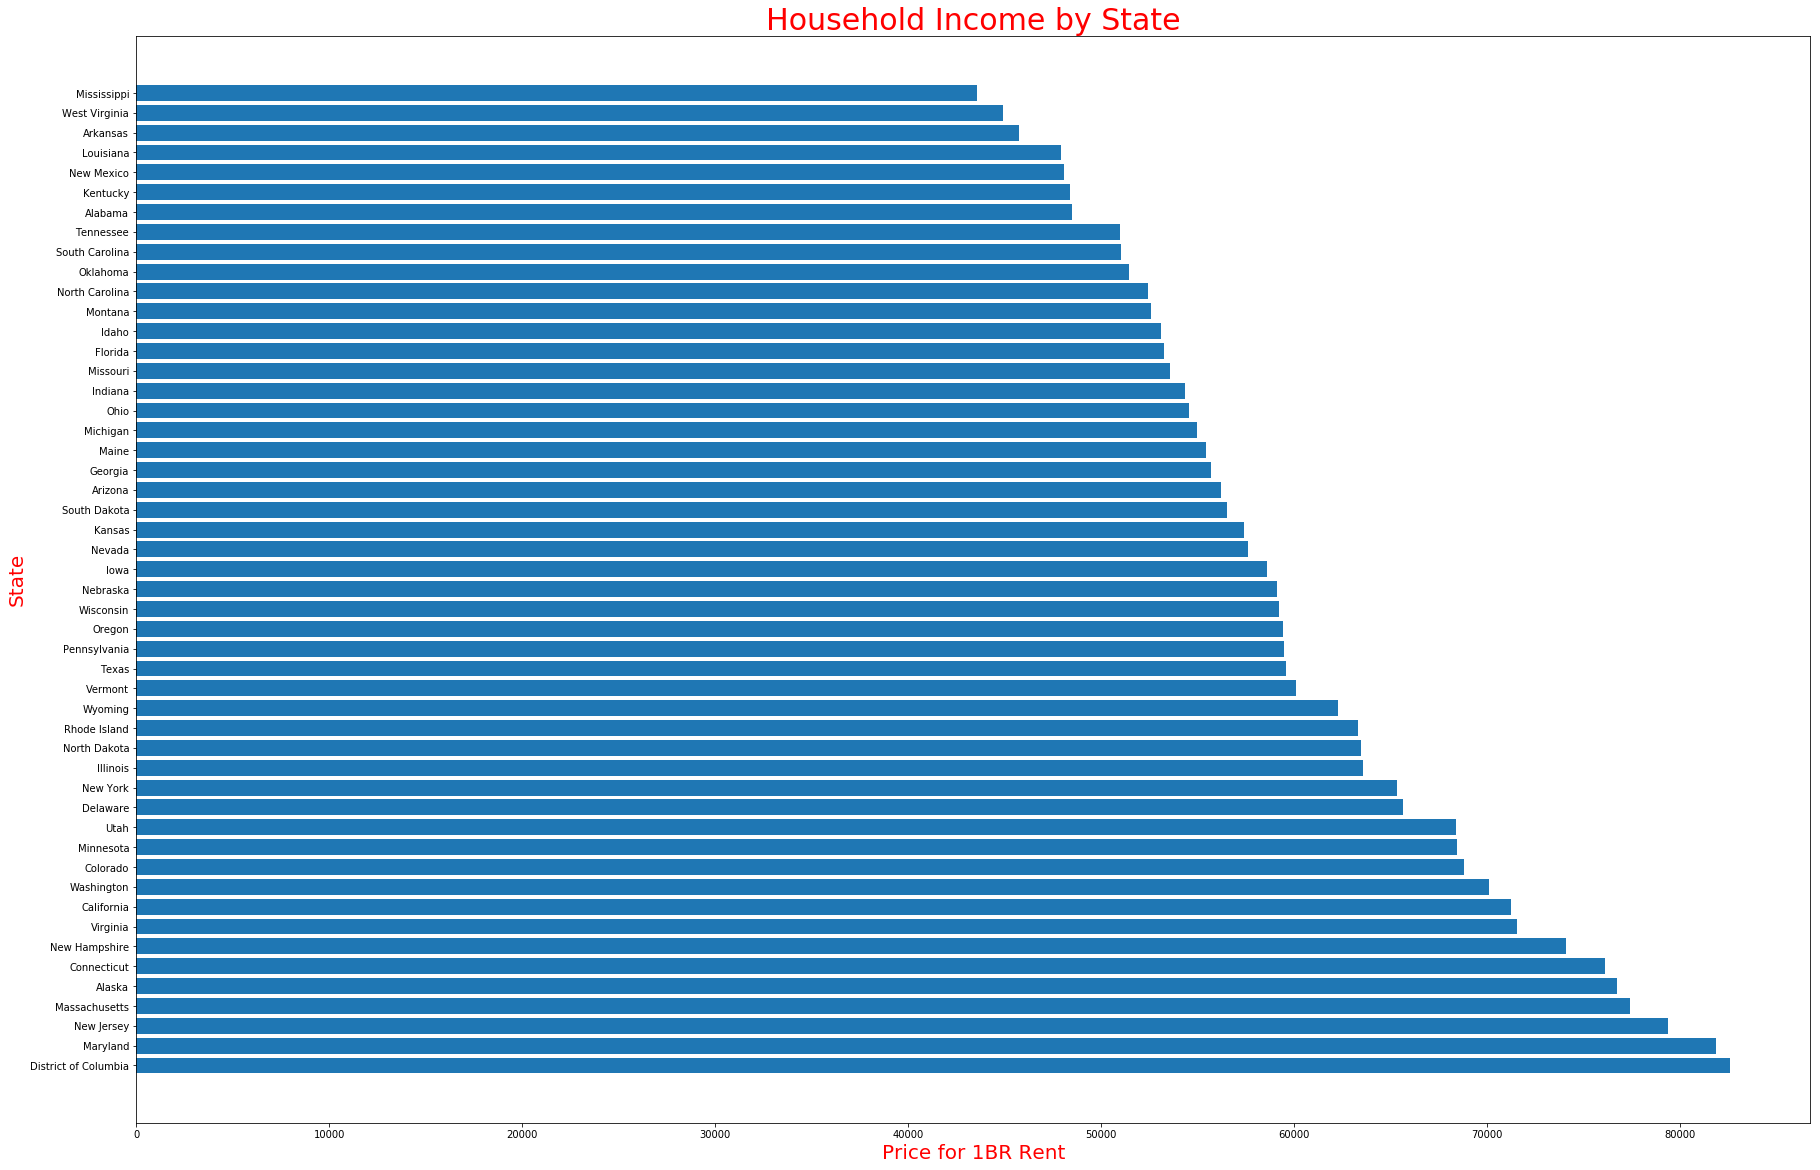

In [60]:
#plotting Household Income by sate graph
plt.figure(figsize=(30,20))
plt.barh(df6["State"], df6["HouseholdIncome"])
plt.title("Household Income by State", fontsize=30, color="red")
plt.xlabel("Price for 1BR Rent", fontsize=20, color="red")
plt.ylabel("State", fontsize=20, color="red")

In [61]:
#finding MAX Household income
df6["HouseholdIncome"].max()

82604

In [62]:
#I want to see state with this income level
df6.query("HouseholdIncome==82604")

,State,Population,HouseholdIncome,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
0,District of Columbia,684498,82604,1510.0,1742.0,-0.1%,1.7%


In [63]:
#finding MIN Household income
df6["HouseholdIncome"].min()

43567

In [64]:
#I want to see state with this income
df6.query("HouseholdIncome==43567")

,State,Population,HouseholdIncome,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
49,Mississippi,2988762,43567,664.0,809.0,0.0%,0.8%


Text(0,0.5,'State')

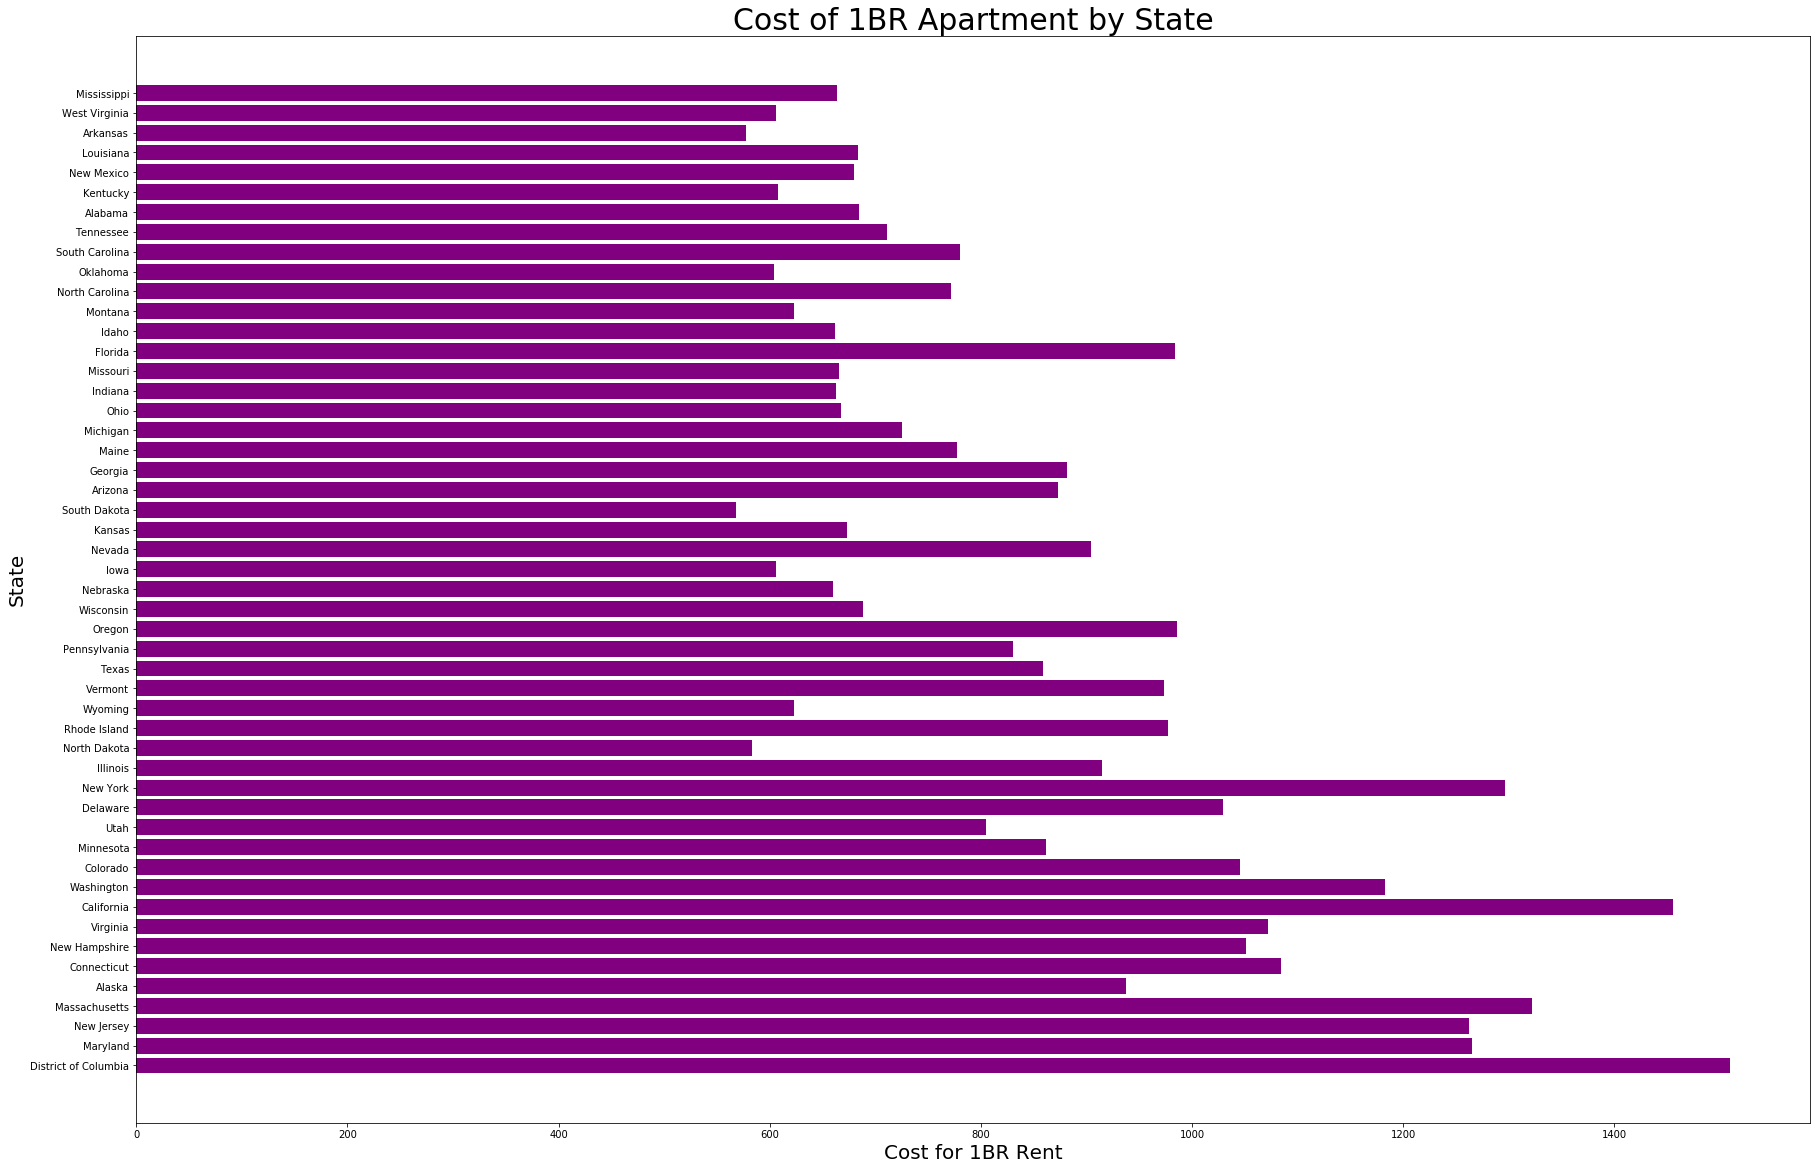

In [65]:
#plotting graph showing cost of 1BR appartment by state
plt.figure(figsize=(30,20))
plt.barh(df6["State"], df6["Median 1BR Rent"], color="purple")
plt.title("Cost of 1BR Apartment by State", fontsize=30)
plt.xlabel("Cost for 1BR Rent", fontsize=20)
plt.ylabel("State", fontsize=20)

In [66]:
#finding MAX Median of 1BR Rent
df6["Median 1BR Rent"].max()

1510.0

In [67]:
#finding MIN Median of 1BR Rent
df6["Median 1BR Rent"].min()

568.0

In [68]:
df6.head()

,State,Population,HouseholdIncome,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
0,District of Columbia,684498,82604,1510.0,1742.0,-0.1%,1.7%
1,Maryland,6003435,81868,1265.0,1524.0,0.0%,0.7%
2,New Jersey,8881845,79363,1262.0,1549.0,-0.1%,1.2%
3,Massachusetts,6830193,77378,1322.0,1643.0,0.0%,1.6%
4,Alaska,738516,76715,937.0,1199.0,0.2%,1.0%


In [69]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
State              50 non-null object
Population         50 non-null int64
HouseholdIncome    50 non-null int64
Median 1BR Rent    50 non-null float64
Median 2BR Rent    50 non-null float64
M/M Rent Change    50 non-null object
Y/Y Rent Change    50 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ KB


In [70]:
#applying "40 times the rent" rule. Can people afford appartments with their incomes? Adding additional column
df6["40x_rule"]=df6["HouseholdIncome"]/40

In [71]:
df6.head()

,State,Population,HouseholdIncome,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change,40x_rule
0,District of Columbia,684498,82604,1510.0,1742.0,-0.1%,1.7%,2065.100
1,Maryland,6003435,81868,1265.0,1524.0,0.0%,0.7%,2046.700
2,New Jersey,8881845,79363,1262.0,1549.0,-0.1%,1.2%,1984.075
3,Massachusetts,6830193,77378,1322.0,1643.0,0.0%,1.6%,1934.450
4,Alaska,738516,76715,937.0,1199.0,0.2%,1.0%,1917.875


In [72]:
#checking if people in all states can afford 2BR appartments with their incomes. Want to find cost of 2BR higher than 40X rule.
df7=df6[(df6["Median 2BR Rent"]>df6["40x_rule"])]

In [73]:
#if you in everage brackets for income in California, you cannot rent 2BR appartment

In [74]:
df7

,State,Population,HouseholdIncome,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change,40x_rule
8,California,39148760,71228,1456.0,1856.0,-0.1%,1.3%,1780.7


In [75]:
import seaborn as sns

In [76]:
#slicing data. I want to perform analysis by cities
df7=df.iloc[51:711,:]

In [77]:
df7.head()


,Location,Type,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
51,"Abilene, TX",City,659.0,875.0,0.3%,1.0%
52,"Acworth, GA",City,936.0,1081.0,0.2%,2.0%
53,"Adelanto, CA",City,1024.0,1280.0,0.0%,-0.3%
54,"Aiken, SC",City,708.0,853.0,0.3%,1.2%
55,"Albany, NY",City,891.0,1097.0,-0.2%,-0.2%


In [78]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 51 to 710
Data columns (total 6 columns):
Location           660 non-null object
Type               660 non-null object
Median 1BR Rent    659 non-null float64
Median 2BR Rent    659 non-null float64
M/M Rent Change    660 non-null object
Y/Y Rent Change    660 non-null object
dtypes: float64(2), object(4)
memory usage: 31.0+ KB


In [79]:
#finding 5 top rent cost. Guess what? All in California!
df8=df7.nlargest(5,["Median 2BR Rent"])
df8

,Location,Type,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
594,"San Mateo, CA",City,3582.0,4501.0,0.2%,1.4%
381,"Ladera Ranch, CA",City,3133.0,4026.0,-0.2%,2.4%
505,"Pacifica, CA",City,3066.0,3851.0,-0.2%,2.6%
199,"Coronado, CA",City,2963.0,3843.0,0.1%,1.6%
284,"Fremont, CA",City,3022.0,3796.0,-0.1%,1.3%


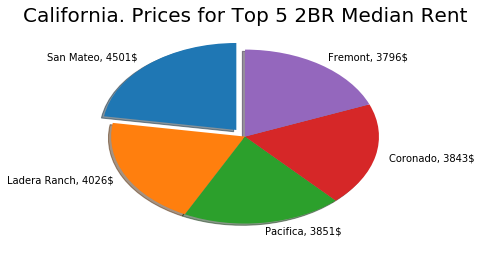

In [80]:
#graphing
labels=["San Mateo, 4501$ ", "Ladera Ranch, 4026$", "Pacifica, 3851$", "Coronado, 3843$", "Fremont, 3796$"]
sizes=[4501.0, 4026.0, 3851.0, 3843.0, 3796.0]
explode=(0.1, 0,0,0,0)
df8, ax1=plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
plt.title("California. Prices for Top 5 2BR Median Rent", fontsize=20)
plt.show()



In [81]:
#finding 5 cheapest rent cost
df9=df7.nsmallest(5,["Median 1BR Rent"])
df9

,Location,Type,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change
69,"Anniston, AL",City,329.0,437.0,0.1%,0.1%
668,"Vandalia, OH",City,499.0,651.0,0.6%,2.6%
398,"Lawton, OK",City,502.0,664.0,0.4%,0.3%
276,"Fort Smith, AR",City,511.0,673.0,0.1%,2.0%
362,"Jefferson City, MO",City,515.0,676.0,0.1%,2.0%


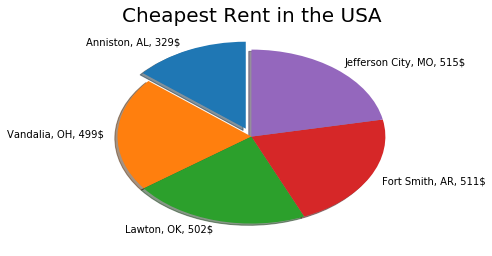

In [82]:
#graphing
labels=["Anniston, AL, 329$ ", "Vandalia, OH, 499$", "Lawton, OK, 502$", "Fort Smith, AR, 511$", "Jefferson City, MO, 515$"]
sizes=[329, 499, 502, 511, 515]
explode=(0.1, 0,0,0,0)
df9, ax1=plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
plt.title("Cheapest Rent in the USA", fontsize=20)
plt.show()

In [83]:
def clean_percent(x):
        return(x.replace('%',""))

In [84]:
df6["Y/Y Rent Change"]=pd.to_numeric(df["Y/Y Rent Change"].apply(clean_percent))

In [85]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 8 columns):
State              50 non-null object
Population         50 non-null int64
HouseholdIncome    50 non-null int64
Median 1BR Rent    50 non-null float64
Median 2BR Rent    50 non-null float64
M/M Rent Change    50 non-null object
Y/Y Rent Change    50 non-null float64
40x_rule           50 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 3.5+ KB


In [110]:
#looking for max percentage of rent change
df6["Y/Y Rent Change"].max()


3.9

In [111]:
#Where is it?
df6[(df6["Y/Y Rent Change"]==3.9)]

,State,Population,HouseholdIncome,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change,40x_rule
8,California,39148760,71228,1456.0,1856.0,-0.1%,3.9,1780.7


In [112]:
#looking for min percentage of rent change
df6["Y/Y Rent Change"].min()

-0.7

In [114]:
#Where is it?
df6[(df6["Y/Y Rent Change"]==-0.7)]

,State,Population,HouseholdIncome,Median 1BR Rent,Median 2BR Rent,M/M Rent Change,Y/Y Rent Change,40x_rule
18,Wyoming,581836,62268,623.0,800.0,0.1%,-0.7,1556.7
